# School Ranking effect on house prices analysis

In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.stats import pearsonr, linregress

In [2]:
# Read CSV_File 
perth_housing = pd.read_csv('Perth_housing_data.csv')
perth_housing.head() 

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [3]:
# Clean data, but KEEP school rank column this time. 
# Delete irrelevant columns = garage, address, floor area.
new_perth_housing = perth_housing.drop(['ADDRESS', 'GARAGE', 'FLOOR_AREA'] , axis =1)

# Remove all null values including
new_perth_housing.dropna(how ='any', inplace = True)

# Remove all rows that have postcodes >=6200 
new_perth_housing = new_perth_housing[new_perth_housing['POSTCODE'] < 6200]

# Convert School distance to meters and convert to integer
new_perth_housing['NEAREST_SCH_DIST'] = (new_perth_housing[['NEAREST_SCH_DIST']] * 1000).astype(int)

#Convert Build Year to Integer 
new_perth_housing['BUILD_YEAR'] = new_perth_housing['BUILD_YEAR'].astype(int) 

In [4]:
school_rank_mean_prices = pd.DataFrame(new_perth_housing.groupby(['NEAREST_SCH_RANK'])['PRICE'].mean())

In [9]:
# Create a Dataframe for mean house prices for each nearest school rank 
school_rank_mean_prices.head()

,PRICE
NEAREST_SCH_RANK,
1.0,1.087471e+06
2.0,1.803434e+06
3.0,1.733799e+06
4.0,1.044099e+06
5.0,1.560000e+06


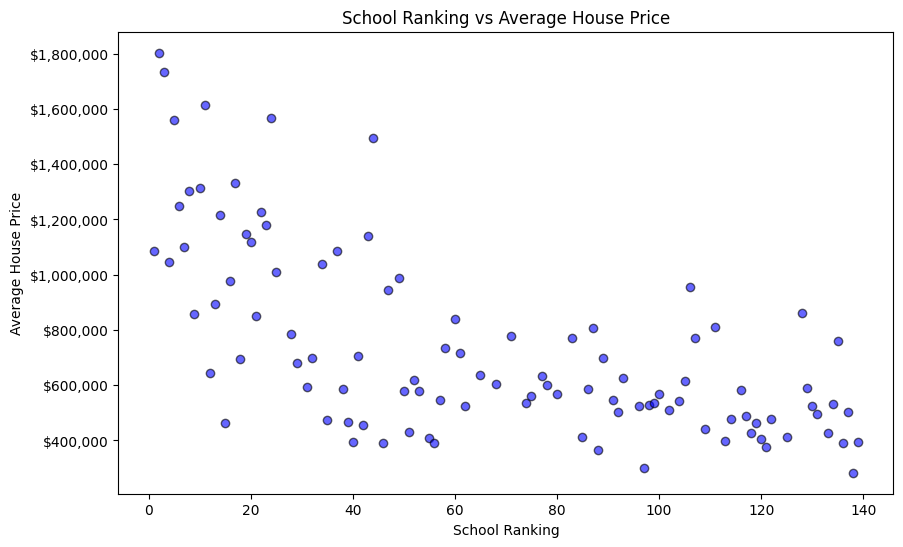

In [6]:
# Create a scatter plot to review the correlation between school rank and average house price. 
x_values = school_rank_mean_prices.index 
y_values = school_rank_mean_prices['PRICE']
# x_ticks = np.arange(0,150,10)

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.6, edgecolor='black')
# plt.xticks(x_ticks)
plt.xlabel('School Ranking')
plt.ylabel('Average House Price')
plt.title('School Ranking vs Average House Price')

# Format y-axis to readable amoutn 
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

The r-squared is: 0.4256534729900981


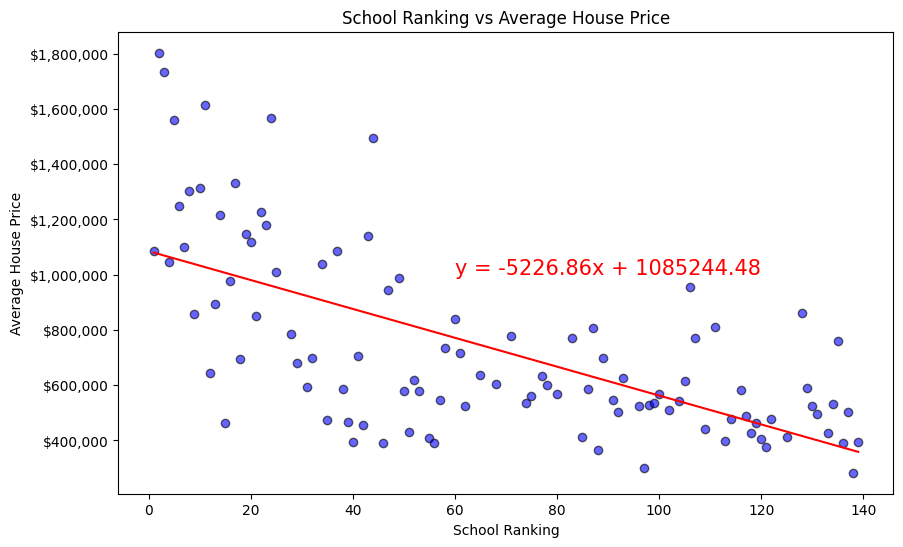

In [7]:
# Create a regression line and get an r-value 
x_values = school_rank_mean_prices.index 
y_values = school_rank_mean_prices['PRICE']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.6, edgecolor='black')
plt.xlabel('School Ranking')
plt.ylabel('Average House Price')
plt.title('School Ranking vs Average House Price')
plt.annotate(line_eq,(60, 1000000),fontsize=15,color="red")

formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

print(f"The r-squared is: {rvalue**2}")

## Given the data available, there seems to be a generally relative correlation between school ranking and average price of houses nearest to these schools. The data indicates a proportion of the variance in the Average House Price can be explained by the school ranking in this limited dataset. 